In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("Arrests.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
df = pd.read_csv("Arrests.csv", index_col = 0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


**getting to know the dataset**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [11]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


**Hopkin TesT**

In [14]:
pip install pyclustertend

Note: you may need to restart the kernel to use updated packages.


In [89]:
from pyclustertend import hopkins
from sklearn.preprocessing import scale


In [93]:
hopkins(scale(df), df.shape[0]) #function with index shape

0.4014901689444489

**K-Means Modelling**

In [96]:
from sklearn.cluster import KMeans

In [196]:
k_means = KMeans(n_clusters = 2, random_state =42)

In [198]:
k_means.fit(df)

KMeans(n_clusters=2, random_state=42)

In [200]:
clusters = k_means.labels_

In [202]:
clusters


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

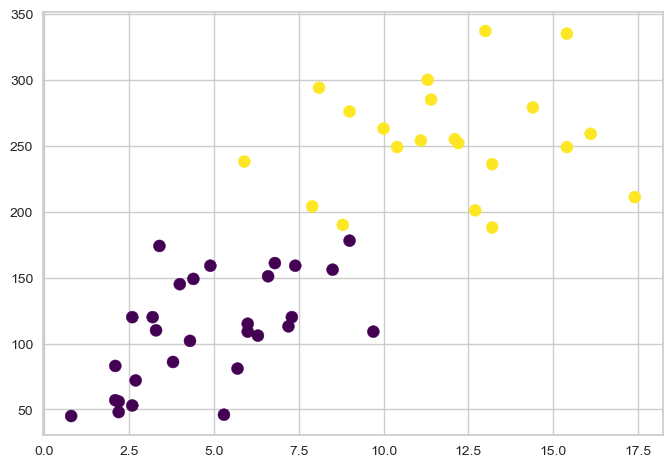

In [204]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 75, cmap = "viridis");

In [108]:
centroids = k_means.cluster_centers_

In [110]:
centroids

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

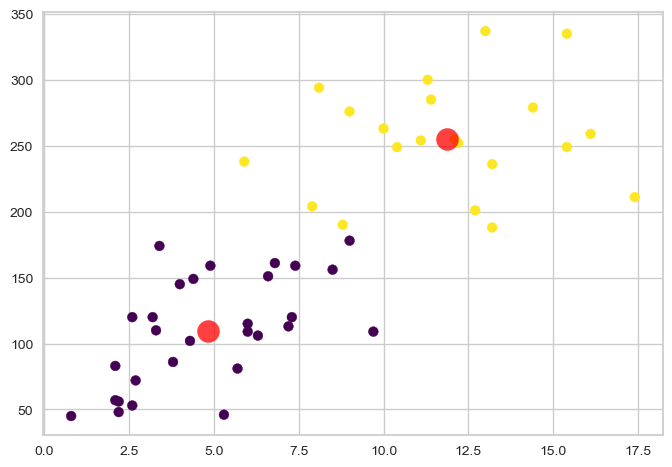

In [206]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis")
plt.scatter(centroids[:,0], centroids[:,1], c = "red", s = 250, alpha=0.75);

**Elbow Method**

In [46]:
rate = []

k = range(2,10)
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    rate.append(kmeans.inertia_)

In [48]:
rate

[96399.02814449917,
 47964.26535714286,
 37036.80255742297,
 24417.023523809523,
 22816.30656043956,
 17058.2565,
 14107.744226190476,
 12587.161976190475]

Text(0.5, 1.0, 'Elbow')

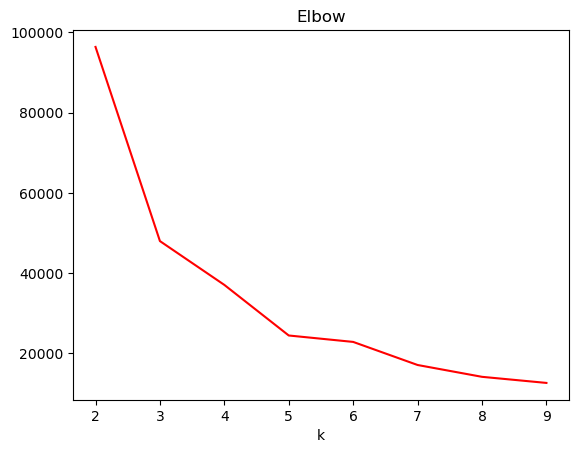

In [52]:
plt.plot(k, rate,"red")
plt.xlabel("k")
plt.title("Elbow")


In [54]:
from yellowbrick.cluster import KElbowVisualizer

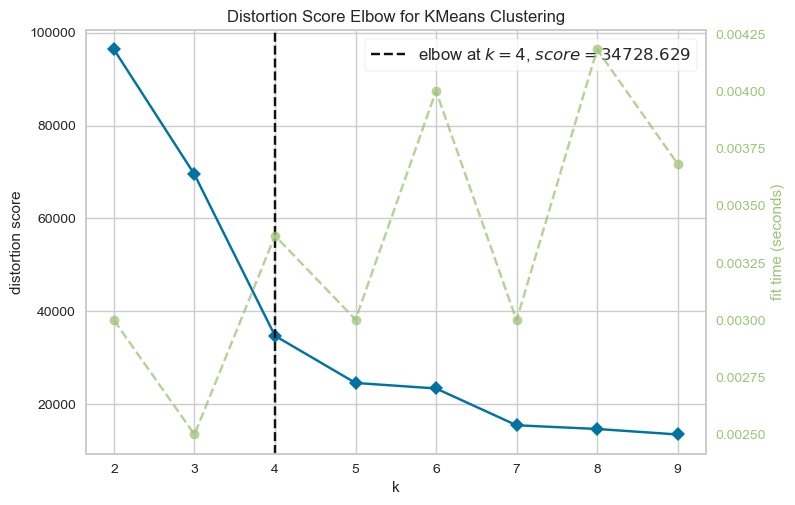

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
kmeans_yellowbrick = KMeans()
graph =  KElbowVisualizer(kmeans_yellowbrick, k = (2,10))
graph.fit(df)
graph.poof()


In [73]:
new_kmeans = KMeans(n_clusters = 4 , random_state=45)

In [75]:
new_kmeans.fit(df)

KMeans(n_clusters=4, random_state=45)

In [77]:
labels = new_kmeans.labels_

In [79]:
labels

array([3, 3, 1, 0, 1, 3, 2, 3, 1, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 1, 0, 3,
       2, 3, 0, 2, 2, 3, 2, 0, 1, 3, 1, 2, 0, 0, 0, 2, 0, 1, 2, 0, 3, 0,
       2, 0, 0, 2, 2, 0])

In [116]:
df["cluster_id"] = labels

In [118]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster_id
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,3
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1


**Silhouette Score**


In [124]:
from sklearn.metrics import silhouette_score

In [130]:
print(f"Silhouette Score(n=4): {silhouette_score(df , labels)}")

Silhouette Score(n=4): 0.41592775030709594


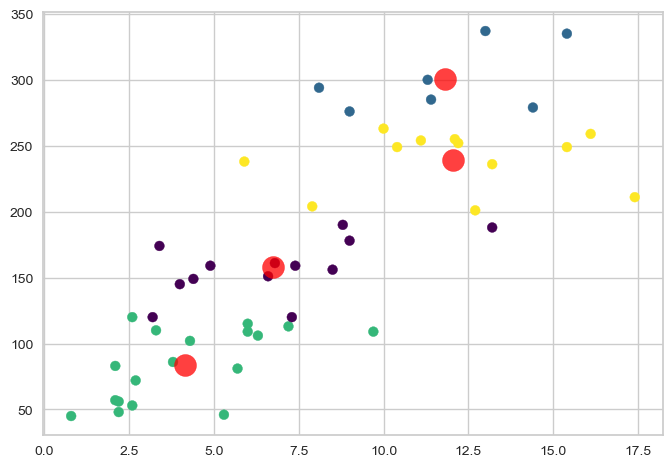

In [136]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = labels, s = 50, cmap = "viridis")
plt.scatter(new_kmeans.cluster_centers_[:,0], new_kmeans.cluster_centers_[:,1], c = "red", s = 250, alpha=0.75);
# plt.show()

**ARI Score**

**The Adjusted Rand Index (ARI) is a measure used to evaluate the similarity between two data clusterings. It assesses how well the clusters predicted by a clustering algorithm (e.g., KMeans) match the true clusters (ground truth) based on a set of pairwise comparisons.**

In [155]:
from sklearn.metrics.cluster import adjusted_rand_score

In [176]:
new_df = df.sample(15, random_state = 42)
new_df

,Murder,Assault,UrbanPop,Rape,cluster_id
Indiana,7.2,113,65,21.0,2
South Carolina,14.4,279,48,22.5,1
New Mexico,11.4,285,70,32.1,1
Virginia,8.5,156,63,20.7,0
Louisiana,15.4,249,66,22.2,3
Wisconsin,2.6,53,66,10.8,2
Nebraska,4.3,102,62,16.5,2
Montana,6.0,109,53,16.4,2
North Carolina,13.0,337,45,16.1,1
Maryland,11.3,300,67,27.8,1


In [178]:
new_df["true_label"] = [1,2,3,0,2,2,1,3,2,0,2,1,1,2,3]

In [180]:
new_df

,Murder,Assault,UrbanPop,Rape,cluster_id,true_label
Indiana,7.2,113,65,21.0,2,1
South Carolina,14.4,279,48,22.5,1,2
New Mexico,11.4,285,70,32.1,1,3
Virginia,8.5,156,63,20.7,0,0
Louisiana,15.4,249,66,22.2,3,2
Wisconsin,2.6,53,66,10.8,2,2
Nebraska,4.3,102,62,16.5,2,1
Montana,6.0,109,53,16.4,2,3
North Carolina,13.0,337,45,16.1,1,2
Maryland,11.3,300,67,27.8,1,0


In [182]:
adjusted_rand_score(new_df["true_label"],new_df["cluster_id"])

0.029197080291970802